In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Correlation

In [2]:
galton = Table.read_table('galton.csv')
galton.show(5)

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5


In [3]:
galton.num_rows

934

In [11]:
galton.select('childHeight', 'gender').group("gender", np.average)

gender,childHeight average
female,64.104
male,69.2341


In [8]:
#galton.pivot("gender", "childHeight", "childHeight", np.average)

/home/jupyter-apoliak@barnard.ed-b8a88/.local/lib/python3.7/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


childHeight,female,male
56,0,0
57,0,0
57.5,0,0
58,0,0
59,0,0
60,0,0
60.1,0,0
60.5,0,0
61,0,0
61.2,0,0


Let's make a table that just has the heights

<details>
<summary>Solution</summary>
  'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
</details>

In [13]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'ChildHeight', galton.column('childHeight')
    )
heights

MidParent,ChildHeight
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


Let's show a scatter plot where MidParent is on the x-axis

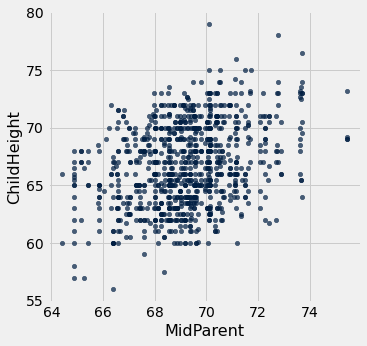

In [14]:
heights.scatter('MidParent')

Now let's predict the child's height based on the average of the parents' height

(brief discussion)

**Question:** What type of trend do we see?

<details>
<summary>Solution</summary>
  We see an association between midParent height and child height
</details>

Let's look at another table

In [15]:
hybrids = Table.read_table('hybrid.csv')
hybrids.show(5)

vehicle,year,msrp,acceleration,mpg,class
Prius (1st Gen),1997,24509.7,7.46,41.26,Compact
Tino,2000,35355,8.2,54.1,Compact
Prius (2nd Gen),2000,26832.2,7.97,45.23,Compact
Insight,2000,18936.4,9.52,53,Two Seater
Civic (1st Gen),2001,25833.4,7.04,47.04,Compact


**Question:** Is there an association between `acceleration` and `mpg`?

<details>
<summary>Code</summary>
  hybrids.select("mpg", "acceleration").scatter("mpg")
</details>

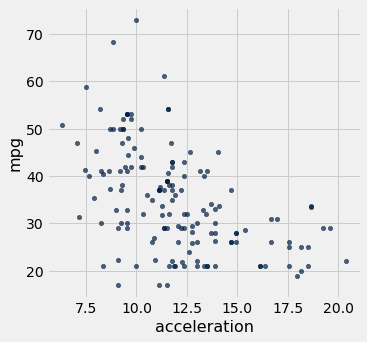

In [16]:
hybrids.scatter("acceleration", "mpg")

**Question:** What does this plot show?

**Question:** What about `acceleration` and price (`msrp`)?

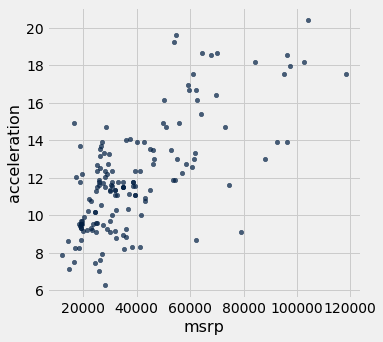

In [17]:
hybrids.select("msrp", "acceleration").scatter("msrp")

**Question:** Do we see the same trends with standard units?

In [18]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

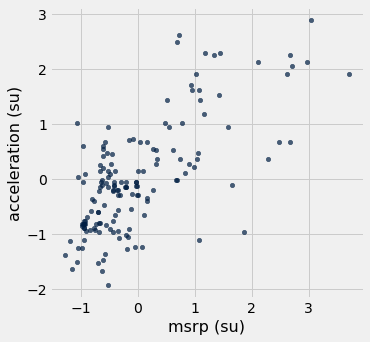

In [21]:
# Steps:
# 1. convert each column to their own standard units
# hybrids.select("msrp", "acceleration")
msrp_su = standard_units(hybrids.column("msrp"))
acc_su = standard_units(hybrids.column("acceleration"))
# 2. store the standard unit columns
hyprid_su_msrp_acc = Table().with_columns(
    "msrp (su)", msrp_su,
    "acceleration (su)", acc_su
)
# 3. show a scatter with the standard units
hyprid_su_msrp_acc.scatter("msrp (su)")

This figure shows us we can measure the assocation between these two variables based on their standard units

(back to slides)

# Correlation Coefficient

Dont worry about this function for now. Just read the doc string

In [22]:
def r_scatter(r):
    """ Draws a scatter diagram with correlation r"""
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

Let's pass in different values to `r_scatter()` and see what we get

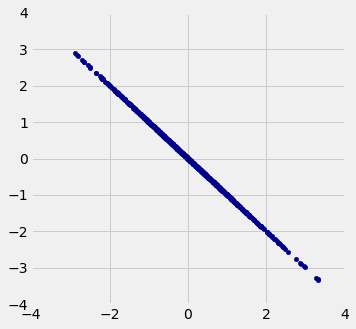

In [38]:
r_scatter(-1)

In [ ]:
r_scatter(0)

# Calculating *r*

Let's look at this small example

In [39]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x,y
1,2
2,3
3,1
4,5
5,2
6,7


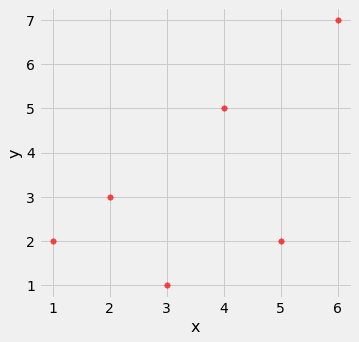

In [40]:
t.scatter('x', 'y', s=30, color='red')

**Question:** What should *r* be here?


<details>
<summary>Solution</summary>
  positive, but less than 1
</details>

Let's try finding *r*

First thing to do is convert the data into ____?


<details>
<summary>Solution</summary>
  standard units
</details>

In [45]:
t = t.with_columns(
    'x (su)', standard_units(x),
    'y (su)', standard_units(y)
)

Let's make another column where each value is x (su) * y (su)

In [46]:
t.column(2) * t.column(3)

array([ 0.94987138,  0.14248071,  0.33245498,  0.23746785, -0.56992283,
        2.6121463 ])

In [47]:
t = t.with_columns('product of standard units', t.column(2) * t.column(3))
t

x,y,x (su),y (su),product of standard units
1,2,-1.46385,-0.648886,0.949871
2,3,-0.87831,-0.162221,0.142481
3,1,-0.29277,-1.13555,0.332455
4,5,0.29277,0.811107,0.237468
5,2,0.87831,-0.648886,-0.569923
6,7,1.46385,1.78444,2.61215


In [48]:
# r is the average of the products of the standard units

r = np.average(t.column(2) * t.column(3))
r

0.6174163971897709

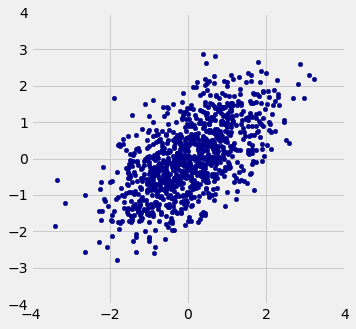

In [49]:
r_scatter(0.6174163971897709)

(back to slides)

## Function to compute *r*

Let's fill in the following function
<details>
<summary>Code</summary>
  x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)
</details>


In [53]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    product_su = x_su * y_su
    return np.average(product_su)

**Question:** How linearly correlated are the variables we considered before from the hybrid cars?

In [54]:
# hybrids.select("msrp", "acceleration")
# acceleration, msrp
hybrids.labels

('vehicle', 'year', 'msrp', 'acceleration', 'mpg', 'class')

In [55]:
correlation(hybrids, "msrp", "acceleration")

0.6955778996913978

In [57]:
correlation(hybrids, 'mpg', 'acceleration')

-0.5060703843771186

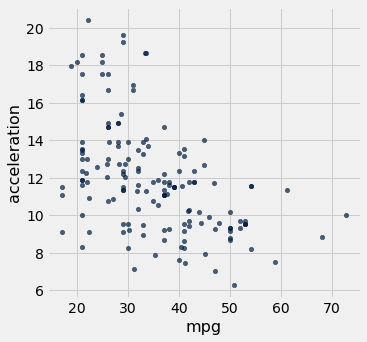

In [60]:
hybrids.select('mpg', 'acceleration').scatter('mpg')

Judging correlations by eye is pretty hard, unless the correlation is -1 and 1

## Switching x and y axes

Do we think our correlations will change?

In [62]:
correlation(hybrids, 'acceleration', 'mpg')

-0.5060703843771186

In [61]:
correlation(hybrids, 'mpg', 'acceleration')

-0.5060703843771186

## Nonlinearity

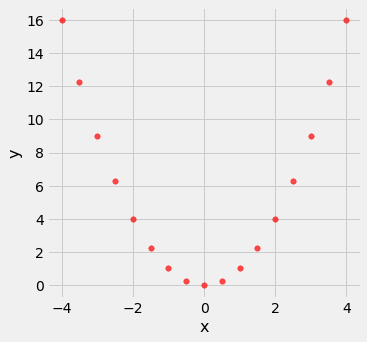

In [63]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

**Question:** are x and y here associated? 
<details>
<summary>Solution</summary>
  Yes, clearly
</details>
    
**Question:** But what is the *r* value?

In [ ]:
y == x**2

In [65]:
correlation(nonlinear, 'x', 'y')

0.0

## Outliers

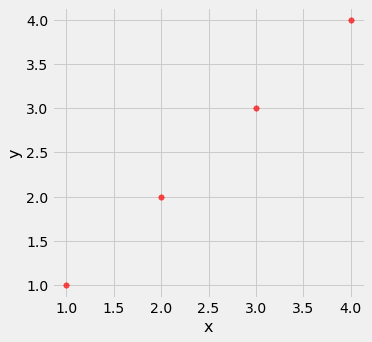

In [66]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

**Question:** What is *r* here

In [67]:
correlation(line, 'x', 'y')

1.0

Now let's look at the same example but with an outlier

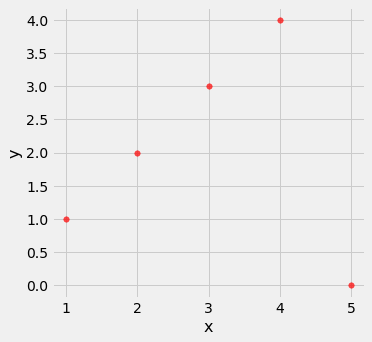

In [68]:

outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

**Question:** Are x and y here still correlated?
    
<details>
<summary>Solution</summary>
  We want to say yes, or atleast mostly
</details>

In [69]:
correlation(outlier, 'x', 'y')

0.0

**Question:** Did the outlier affect the correlation?
    
<details>
<summary>Solution</summary>
  Yes!
</details>

(back to slides)
## Ecological Correlations

In [ ]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

**Question:** Is there a correlation between `Math` and `Critical Reading` scores on the SAT?

In [ ]:
sat2014.scatter('Critical Reading', 'Math')

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')

If we want to predict math score from critical reading score, we think about it on an individual case.

But here, the data is on the state level. We can see that the correlation is inflated when we aggregate the data. This relationship won't be true on the individual level

**Question:** If we didn't aggregate the data, how many points would we see in the graph?

<details>
<summary>Solution</summary>
  A lot more. For every point we see in the graph, we would see blob of points where the center of a blob was one of the points in our graph
</details>

When showing a scatter plot and computing *r*, think about the individuals and the aggregate

# Prediction

In [70]:
galton = Table.read_table('galton.csv')
galton.show(5)

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5


In [71]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


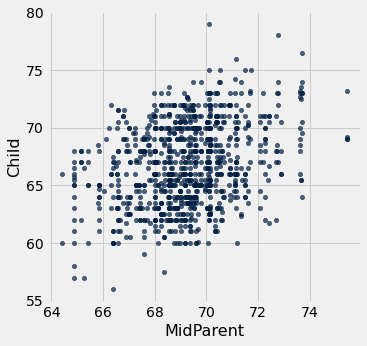

In [72]:
heights.scatter('MidParent')

**Question:** Are these two variables correlated?

**Question:** Can we quantify how linearly correlated they are?

In [73]:
correlation(heights, "MidParent", "Child")

0.32094989606395924

### Predicting child heights based on parent's midheight

In [83]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
    return close_points.column('Child').mean()

In [75]:
(72 + 5*12+4) / 2

68.0

In [78]:
predict_child(68)

66.24045801526718

In [82]:
h = 68
close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
np.mean(close_points.column("Child"))

66.24045801526718

In [84]:
heights.apply(predict_child, 'MidParent')

array([70.1       , 70.1       , 70.1       , 70.1       , 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 68.5025    , 68.5025    ,
       68.5025    , 68.5025    , 68.5025    , 68.5025    , 68.5025    ,
       66.43149606, 66.43149606, 66.43149606, 66.43149606, 66.43149606,
       66.43149606, 70.41578947, 70.41578947, 70.41578947, 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 69.18571429, 69.18571429,
       69.18571429, 69.18571429, 68.66052632, 67.63423913, 67.63423913,
       67.63423913, 67.63423913, 67.63423913, 67.63423913, 67.63423913,
       67.63423913, 67.37410714, 68.77428571, 68.77428571, 68.77428571,
       68.77428571, 68.59230769, 68.59230769, 68.59230769, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.07323944, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.05465116, 68.05465116,
       68.05465116, 68.05465116, 68.05465116, 68.05465116, 67.56276596,
       67.56276596, 67.56276596, 67.71678832, 70.41578947, 70.41

In [85]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

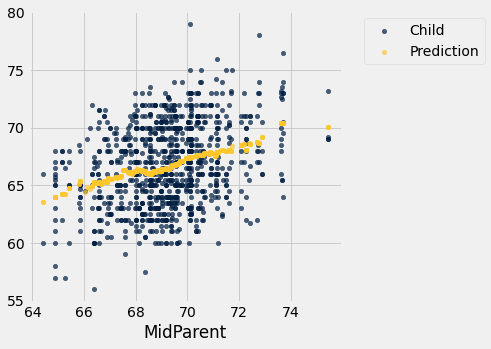

In [86]:
heights_with_predictions.scatter('MidParent')

(back to slides)
# Linear Regression

In [87]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in this class


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_table(r):
    """
    Generate a table of 1000 x,y data points in standard units
    whose correlation is approximately equal to r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

Let's look at an example where our data is linearly correlated

In [88]:
example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


`example` is a table of 1k examples where `x` and `y` have a correlation coefficient of 0.99



**Question:** How could we visualize the correlation?

<details>
<summary>Solution</summary>
  example.scatter('x', 'y')
</details>

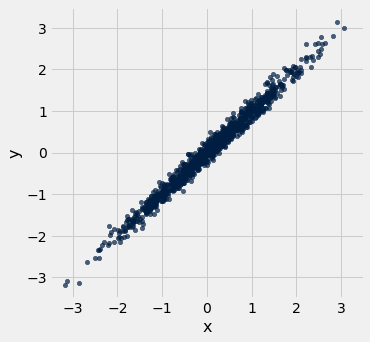

In [90]:
example.scatter('x')
resize_window()

Let's now make our predictions

In [91]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))

**Question:** What should our `y` value be when `x` is 0?

In [92]:
nn_prediction_example(0)

0.006236760779085388

**Question** What about when `x` is 2 or -2?

In [93]:
nn_prediction_example(2.5), nn_prediction_example(-3)

(2.4383239070962976, -3.135531435646115)

Now let's apply the prediction function to our table

In [94]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

Let's plot the predictions (in yellow)

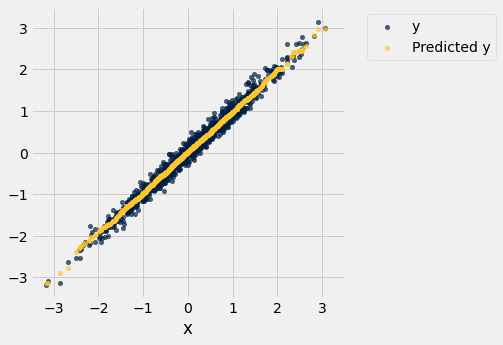

In [95]:
example.scatter('x')
resize_window()

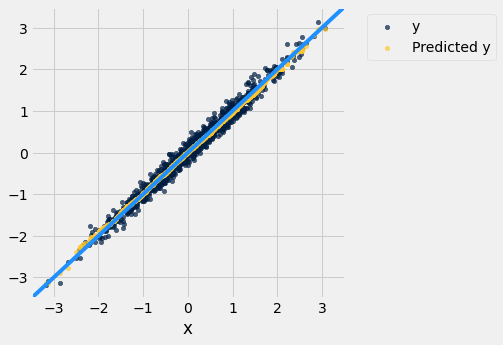

In [96]:
example.scatter('x')
draw_line(slope=1, color='dodgerblue')
resize_window()

Now let's make a new table where the data is not linearly correlated

In [ ]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [ ]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=0, color='dodgerblue')
resize_window()

Now let's look at an example where the scatter plot is oval shaped

In [ ]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

(back to slides)

# Linear regression: defining the line


In [ ]:
# Copy-pasted from above
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)

**Question:** let's compute the slope and intercept

<details>
<summary>Equation</summary>
  ![image.png](slope_intercept_eq.png)
</details>


<!-- copy the equation markdown to this cell and change the cell to markdown -->
(put equation here)

In [ ]:
def slope(t, x, y):
    

def intercept(t, x, y):
    return 

In [ ]:
example = r_table(0.5)
slope(example, 'x', 'y')

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook()
grader.export("Lecture_19_completed.ipynb", pdf=False)